## Theory Part

[**Q1**] _The following is the AdaGrad algorithm for weight update._

$$ cache_i = cache_i + (∇_{w_i}L)^2 $$

$$ w_i = w_i - \frac{η}{\sqrt{cache_i} + \epsilon}∇_{w_i}L $$

_where $w_i$ is the weight to be updated, $∇_{w_i}L$ is the gradient of the loss w.r.t $w_i$ , $\epsilon$ is a hyperparemeter between $10^{−8}$ and $10^{−4}$ and η is a hyperparameter similar to step size in SGD. List one difference between AdaGrad and SGD in terms of step size and **explain** what effects you expect from this difference._

**ANSWER: **

SGD use constant step size, which suffers from descending too slow in a flat, non-minumum areas and descending too fast in the steeper area. 

$$ w_i = w_i - η∇_{w_i}L $$

AdaGrad attempts to mitigate this by introducing a _cache_; in this case it is the sum of the previous gradients squared. By dividing the gradient descent by the square root of the cache, this means that the gradient will descend faster when the cache is small, and slower when the cache is big.

Small cache means that the gradient has been small for the past iterations, meaning that the model is currently at a "flat" area of the graph, and it should move faster as everything around the area is generally going to be flat, so that the model can move to an area that actually has a minimum. Big cache means that the gradient has been big for the past iterations, implying a "steep" area in which the model should descend more slowly on, in order to not miss the minimum point. To this end, AdaGrad will perform better than SGD in terms of both speed and performance.

[**Q2**] The following are the defining equations for an LSTM cell,

$$ i_t = \sigma(W^i_{x_t} + U^i h_{t-1}) $$
$$ f_t = \sigma(W^f_{x_t} + U^f h_{t-1}) $$
$$ o_t = \sigma(W^o_{x_t} + U^o h_{t-1}) $$
$$ \hat{c_t} = tanh(W^c_{x_t} + U^c h_{t-1}) $$
$$ c = f_t ◦ c_{t-1} + i_t ◦ \hat{c_t} $$
$$ h_t = o_t ◦ tanh(c_t) $$

The symbol $◦$ denotes element-wise multiplication and $\sigma(x) = \frac{1}{1+e^{−x}}$ is the sigmoid function. Answer True/False to the following questions and give not more than 2 sentences explanation. 
1. If $x_t = 0$ vector then $h_t = h_{t−1}$. 
2. If $f_t$ is very small or zero, then the error will not be back-propagated to earlier time steps.
3. The entries of $f_t,i_t,o_t$ are non-negative.
4. $f_t,i_t,o_t$ can be seen as probability distributions, which means that their entries are nonnegative and their entries sum to 1.

**ANSWER:**

1. False. The cell forward pass is still affected by $U^* \cdot h_{t-1}$ (where $* \epsilon \{i, f, o\}$).
2. False. Backpropagation will still occur according to $i_t$ and $o_t$.
3. True. As $i_t, f_t, o_t$ is the output of sigmoid functions, it will only lie in (0, 1) as output. 
4. False. While the entries are non-negative, they graph does not sum up to 1. As $\sigma(\infty) = 1$, it is impossible for the sum of the graph to be equal to 1. 


[**Q3**]  The deﬁning equations for a GRU cell are, 

$$ z_t = \sigma(W^z x_t + u^z h_{t-1}) $$
$$ r_t = \sigma(W^r x_t + u^r h_{t-1}) $$
$$ \hat h_t = tanh(Wx_t + r_t ◦ Uh_{t-1}) $$
$$ h_t = z_t ◦ h_{t-1} + (1 - z_t) ◦ \hat h_t $$

1. Draw a diagram of this GRU cell.
2. Assume $h_t$ and $x_t$ are column vectors, with dimensions $d_h$ and $d_x$ respectively. What are the dimensions (rows × columns) of the weight matrices $W^z,W^r,W,U^z,U^r,$ and $U$? 
3. Like LSTM cells, GRU cells can tackle vanishing or exploding gradient problem too. By taking a look at the formula for LSTM in Q2, what is the main advantage of using GRU cells over LSTMs for some problems? Give an answer it at most 5 sentences. _Hint: We expect a qualitative answer (deep math proofs are not required) that comes with an explanation of the answer._

**ANSWERS**

1. GRU Cell diagram is as follows (drawn with [draw.io](http://www.draw.io))
![gru-cell](grucell.jpg)
2. Corresponding dimensions:
$$ from \space their \space matrix \space multiplications: $$
$$ d_{W}^z = a × d_x, \quad d_{U}^z = a × d_h, \quad d_{z} = a × 1$$
$$ d_{W}^r = b × d_x, \quad d_{U}^r = b × d_h, \quad d_{r} = b × 1$$
$$ d_{U} = c × d_h $$
$$ $$
$$ from \space their \space elementwise \space multiplications: $$
$$ d_{z} = d_h × 1 , \quad a = d_h$$
$$ d_{r} = d_h × 1 , \quad b = d_h$$
$$ c = d_h $$
$$ $$
$$ therefore: $$
$$ d_{W}^z = d_h × d_x, \quad d_{U}^z = d_h × d_h$$
$$ d_{W}^r = d_h × d_x, \quad d_{U}^r = d_h × d_h$$
$$ d_{U} = d_h × d_h $$
$$ $$
3. The main advantage is that GRU has 2 gates instead of 3, meaning that the parameters required to train in GRU is less than that of LSTM; assuming they perform with the same accuracy, GRU is more computationally efficient.

## Coding Part

In [1]:
from hw6_code import *

star_filter = ['NEXTEPISODE']
dataset = MovieScriptDataset('../dataset/startrek/star_trek_transcripts_all_episodes_f.csv',
                             filterwords=star_filter)
train_data, test_data = dataset.split_train_test()
print(train_data.line_list[-1], '\n')
print(train_data.line_list[-3], '\n')
print(train_data.line_list[-5], '\n')
print(train_data.line_list[-10], '\n')
print(train_data.line_list[-50], '\n')

KIRK: What is it? 

PIKE: There's no indication of problems down there, but let's not take chances. 

VINA: I think it's time to show the Captain our secret. 

KIRK: Spock! 

SPOCK: Spock to transporter room. 



In [2]:
lstm_mod = CoveredLSTM(len(charspace), 200, 3, len(charspace)).cuda()

In [3]:
print("training")
trained_model, train_loss_acc, test_loss_acc = train(train_data, test_data, lstm_mod, resume_from=0, save_model_every=5,
                                                     learnrate=2.5e-1, batch_size=20, sample_every=5000, epoch=15)

training
EPOCH 0
      >> Epoch loss 2.38817 accuracy 0.220                    in 169.9061s
      >> Epoch loss 0.82465 accuracy 0.332                    in 36.5304s
      sample line: SCOTT: It's working, sir.
      sample output: SPCC:: I  t toue ng  tote
EPOCH 1
      >> Epoch loss 1.67508 accuracy 0.408                    in 169.8923s
      >> Epoch loss 0.61761 accuracy 0.480                    in 37.3077s
      sample line: KIRK : Clear passageways immediately. The Ambassador will be escorted to his quarters at once.
      sample output: KIRK:: Saatt irrtere  n  tnpitinte.e 
Iheycnpiseel r oetl te antett d to tes tuett d .on ander
EPOCH 2
      >> Epoch loss 1.33498 accuracy 0.516                    in 170.1230s
      >> Epoch loss 0.52836 accuracy 0.548                    in 36.6199s
      sample line: ZARABETH: It was not enough that he execute my kinsmen. Zor Kahn determined to destroy our entire family. He used the atavachron to send us places no one could ever find us.
     

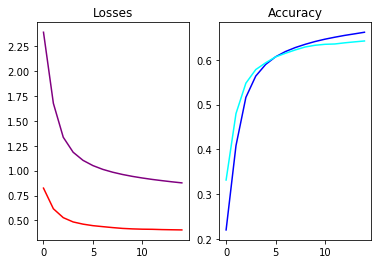

In [4]:
plot_over_epoch(train_loss_acc, test_loss_acc)

purple: train loss

red: test loss

dark blue: train accuracy

light blue: test accuracy

In [5]:
# sampling 50 sentences
for i in range(50):
    print('GENERATED:', trained_model.sample(max_length=500))

GENERATED: ODONA: I would do it.
GENERATED: UHURA: Sensors programmed it. I was arrive and move.
GENERATED: BROWN: I was an indee of the planet surface control.
GENERATED: NOMAD: So the crew work and engineering course.
GENERATED: JARIS: I said I have to be increasing to attend the orcinition. It was an answer. Now. There were an engines in the computer control. For the computer read in the chances. There's no survivors to be a worse.
GENERATED: ELAAN: I wondered the captain. There will be it being we there.
GENERATED: APRIL: What are you doing?
GENERATED: EM3GREEN: I was something to say in the ship.
GENERATED: KIRK: You have a solad has had to be taken on the ship. They were not completely their action of this planet.
GENERATED: LAZARUS: But the ship is true, Captain.
GENERATED: TAMAR: They were here.
GENERATED: PIKE: They didn't say there's a big blood control of the planet of the basic controls. All centuries?
GENERATED: LEILA: I don't know. He's gone a trained to another computers